## 1.Environment Setup

In [29]:
# Import thư viện cần thiết
import os
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from datetime import datetime

# Machine Learning Models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Metrics and Model Selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

warnings.filterwarnings('ignore')

# Đặt seed để đảm bảo kết quả nhất quán giữa các lần chạy
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)
random.seed(SEED)
print(f"Seed: {SEED}")

# Tạo thư mục lưu mô hình
os.makedirs('../models/saved_models', exist_ok=True)
os.makedirs('../results/figures', exist_ok=True)

Seed: 42


## 2.Data Processing

In [ ]:
# # https://drive.google.com/drive/folders/1cMoqIDEgGYDVzv8B7cKp3csxujQ4OFp7?usp=drive_link
# !gdown --folder 1cMoqIDEgGYDVzv8B7cKp3csxujQ4OFp7

Retrieving folder contents
Processing file 1-uEgwNEQuXxptpGi3ygyCi7dm3zOdOR7 dt_test.csv
Processing file 1ciaTX6DHr63apY5pP37K-zeP50VHuGwC dt_train.csv
Processing file 1b88sXRS3mTpP2WUE3uxVwIWh3Ew1MDDB dt_val.csv
Processing file 1etvPpYlkdiz_APIsMlK-Lzjuo_bhx2x2 fe_dt_test.csv
Processing file 1WxUV4z2QMV0KZTjL9-c50fQU13Hgt3m7 fe_dt_train.csv
Processing file 1bE9NHVx6eaXW-NkHimdvaPU94BeATEAX fe_dt_val.csv
Processing file 1UUi6bKKrXbq7i1mDLnzB1b0HdZyP5voU fe_test.csv
Processing file 1XNUMiEPAeeNxwFh8Us5ahS1O2UmOiBR- fe_train.csv
Processing file 1xQN3iXp72II_oqEte1nYR6Wd5DZ_BOQw fe_val.csv
Processing file 1zOvFmhdyPgAHkPiVcPy0Bfu2cBrcoTWv raw_test.csv
Processing file 1o9O3hEhZW58dRLHqvIqfCQ9l9TXgsBD_ raw_train.csv
Processing file 1lZ8sBN2lcYwLqnzyPaGCw1z9qIog5Kr0 raw_val.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1-uEgwNEQuXxptpGi3ygyCi7dm3zOdOR7
To: /content/dataset_v3/dt

In [3]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    display(df.head())

    X = df.drop('target', axis=1)
    y = df['target']
    display(y.value_counts())

    print("Shape df: ", df.shape)
    print("Shape X: ", X.shape)
    print("Shape y: ", y.shape)

    return X, y

### 2.1 Original Dataset

In [4]:

X_train, y_train = read_csv('../data/processed/raw_train.csv')
X_val, y_val = read_csv('../data/processed/raw_val.csv')
X_test, y_test = read_csv('../data/processed/raw_test.csv')


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-0.729485,-0.395692,0.458139,0.708371,-0.445445,1.0,1.000000,0.0,1.0,0.0,0.5,0.000000,1.0,1
1,0.050166,-0.054513,0.230598,0.222495,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,-0.061212,0.059213,0.723605,0.399178,-0.891627,0.0,0.333333,1.0,1.0,1.0,0.0,0.333333,0.0,0
3,-0.061212,-1.305501,1.121803,0.266666,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,1.0,0
4,0.272924,0.514117,-0.167601,-1.190962,-0.713154,0.0,1.000000,0.0,0.0,1.0,0.5,0.000000,1.0,1


0    131
1    111
Name: target, dtype: int64

Shape df:  (242, 14)
Shape X:  (242, 13)
Shape y:  (242,)


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-1.063621,0.400391,-0.262410,0.089984,-0.713154,0.0,1.000000,0.0,1.0,1.0,0.5,0.0,0.0,0
1,1.720848,-0.054513,1.368307,-1.809349,1.250048,1.0,1.000000,0.0,1.0,0.0,0.5,1.0,0.0,1
2,-0.061212,1.082748,-0.338257,0.664201,0.536156,1.0,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.941197,0.229802,0.040979,0.973394,-0.891627,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.495681,0.229802,-0.300333,0.487519,-0.445445,1.0,1.000000,0.0,0.0,0.0,0.5,0.0,1.0,0


0    16
1    14
Name: target, dtype: int64

Shape df:  (30, 14)
Shape X:  (30, 13)
Shape y:  (30,)


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0.384303,-0.168240,-0.641646,-0.837597,1.071575,1.0,1.000000,0.0,1.0,1.0,0.5,1.0,1.0,1
1,-2.288787,-0.736870,-1.286348,1.061736,-0.891627,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0.829818,-0.054513,-0.357219,-0.175039,0.714629,1.0,0.666667,0.0,0.0,0.0,0.5,1.0,1.0,0
3,-0.395349,-0.054513,0.116827,-0.042528,-0.445445,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-1.397757,-0.623144,-0.186562,1.945146,-0.177735,1.0,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,0


0    17
1    14
Name: target, dtype: int64

Shape df:  (31, 14)
Shape X:  (31, 13)
Shape y:  (31,)


### 2.2 FE Dataset

In [5]:
X_fe_train, y_fe_train = read_csv('../data/processed/fe_train.csv')
X_fe_val, y_fe_val =  read_csv('../data/processed/fe_val.csv')
X_fe_test, y_fe_test = read_csv('../data/processed/fe_test.csv')

,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,0.458139,1.0,0.708371,0.726265,1.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.230598,0.0,0.222495,-0.054469,1.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,-0.891627,1.0,0.723605,0.0,0.399178,0.099522,0.0,0
3,0.0,1.0,0.0,1.0,0.0,1.0,-0.891627,1.0,1.121803,0.0,0.266666,0.031766,1.0,0
4,0.0,1.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.167601,1.0,-1.190962,-0.859761,0.0,1


0    131
1    111
Name: target, dtype: int64

Shape df:  (242, 14)
Shape X:  (242, 13)
Shape y:  (242,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,1.0,0.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.262410,1.0,0.089984,0.628019,0.0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.250048,0.0,1.368307,1.0,-1.809349,-1.592443,1.0,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.536156,1.0,-0.338257,0.0,0.664201,0.235034,1.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.040979,0.0,0.973394,-0.161823,0.0,0
4,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,-0.300333,1.0,0.487519,-0.163464,1.0,0


0    16
1    14
Name: target, dtype: int64

Shape df:  (30, 14)
Shape X:  (30, 13)
Shape y:  (30,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,0.0,1.0,1.0,0.0,1.0,0.0,1.071575,0.0,-0.641646,1.0,-0.837597,-0.736915,1.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,-1.286348,0.0,1.061736,2.749978,1.0,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.714629,0.0,-0.357219,1.0,-0.175039,-0.619566,1.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.445445,1.0,0.116827,0.0,-0.042528,0.071622,0.0,0
4,0.0,1.0,0.0,1.0,0.0,1.0,-0.177735,0.0,-0.186562,0.0,1.945146,2.141882,1.0,0


0    17
1    14
Name: target, dtype: int64

Shape df:  (31, 14)
Shape X:  (31, 13)
Shape y:  (31,)


### 2.3 Original + DT Dataset

In [6]:
X_dt_train, y_dt_train = read_csv('../data/processed/dt_train.csv')
X_dt_val, y_dt_val = read_csv('../data/processed/dt_val.csv')
X_dt_test, y_dt_test = read_csv('../data/processed/dt_test.csv')

,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,1.0,1.000000,0.000000,-0.445445,0.458139,-0.729485,0.708371,1.0,0.5,0.0,1
1,0.0,0.333333,0.000000,-0.891627,0.230598,0.050166,0.222495,1.0,0.0,0.0,0
2,0.0,0.333333,0.333333,-0.891627,0.723605,-0.061212,0.399178,0.0,0.0,1.0,0
3,1.0,0.333333,0.000000,-0.891627,1.121803,-0.061212,0.266666,1.0,0.0,0.0,0
4,1.0,1.000000,0.000000,-0.713154,-0.167601,0.272924,-1.190962,0.0,0.5,1.0,1


0    131
1    111
Name: target, dtype: int64

Shape df:  (242, 11)
Shape X:  (242, 10)
Shape y:  (242,)


,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,0.0,1.000000,0.0,-0.713154,-0.262410,-1.063621,0.089984,0.0,0.5,1.0,0
1,0.0,1.000000,1.0,1.250048,1.368307,1.720848,-1.809349,1.0,0.5,0.0,1
2,1.0,0.666667,0.0,0.536156,-0.338257,-0.061212,0.664201,1.0,0.0,0.0,0
3,0.0,0.666667,0.0,-0.891627,0.040979,0.941197,0.973394,0.0,0.0,0.0,0
4,1.0,1.000000,0.0,-0.445445,-0.300333,0.495681,0.487519,1.0,0.5,0.0,0


0    16
1    14
Name: target, dtype: int64

Shape df:  (30, 11)
Shape X:  (30, 10)
Shape y:  (30,)


,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,1.0,1.000000,1.0,1.071575,-0.641646,0.384303,-0.837597,1.0,0.5,1.0,1
1,0.0,0.000000,0.0,-0.891627,-1.286348,-2.288787,1.061736,1.0,0.0,0.0,0
2,1.0,0.666667,1.0,0.714629,-0.357219,0.829818,-0.175039,1.0,0.5,0.0,0
3,0.0,0.666667,0.0,-0.445445,0.116827,-0.395349,-0.042528,0.0,0.0,0.0,0
4,1.0,0.666667,0.0,-0.177735,-0.186562,-1.397757,1.945146,1.0,1.0,0.0,0


0    17
1    14
Name: target, dtype: int64

Shape df:  (31, 11)
Shape X:  (31, 10)
Shape y:  (31,)


### 2.4 FE + DT Dataset

In [7]:
X_fe_dt_train, y_fe_dt_train =  read_csv('../data/processed/fe_dt_train.csv')
X_fe_dt_val, y_fe_dt_val = read_csv('../data/processed/fe_dt_val.csv')
X_fe_dt_test, y_fe_dt_test = read_csv('../data/processed/fe_dt_test.csv')

,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,0.0,1.0,1.0,0.952258,0.726265,-0.445445,0.458139,-0.729485,1.0,0.0,1
1,1.0,0.0,1.0,0.082082,-0.054469,-0.891627,0.230598,0.050166,1.0,0.0,0
2,1.0,0.0,0.0,0.606839,0.099522,-0.891627,0.723605,-0.061212,0.0,0.0,0
3,0.0,0.0,1.0,0.965051,0.031766,-0.891627,1.121803,-0.061212,1.0,0.0,0
4,0.0,1.0,1.0,-0.411237,-0.859761,-0.713154,-0.167601,0.272924,0.0,0.0,1


0    131
1    111
Name: target, dtype: int64

Shape df:  (242, 11)
Shape X:  (242, 10)
Shape y:  (242,)


,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,1.0,1.0,1.0,0.524962,0.628019,-0.713154,-0.262410,-1.063621,0.0,0.0,0
1,1.0,1.0,0.0,-0.068646,-1.592443,1.250048,1.368307,1.720848,1.0,0.0,1
2,0.0,0.0,1.0,-0.348393,0.235034,0.536156,-0.338257,-0.061212,1.0,1.0,0
3,1.0,0.0,1.0,-0.621316,-0.161823,-0.891627,0.040979,0.941197,1.0,1.0,0
4,0.0,1.0,1.0,-0.652540,-0.163464,-0.445445,-0.300333,0.495681,1.0,0.0,0


0    16
1    14
Name: target, dtype: int64

Shape df:  (30, 11)
Shape X:  (30, 10)
Shape y:  (30,)


,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,0.0,1.0,0.0,-0.875417,-0.736915,1.071575,-0.641646,0.384303,0.0,0.0,1
1,1.0,0.0,1.0,0.624900,2.749978,-0.891627,-1.286348,-2.288787,1.0,0.0,0
2,0.0,0.0,0.0,-0.873880,-0.619566,0.714629,-0.357219,0.829818,1.0,1.0,0
3,1.0,0.0,1.0,0.317862,0.071622,-0.445445,0.116827,-0.395349,1.0,1.0,0
4,0.0,0.0,1.0,0.957741,2.141882,-0.177735,-0.186562,-1.397757,1.0,1.0,0


0    17
1    14
Name: target, dtype: int64

Shape df:  (31, 11)
Shape X:  (31, 10)
Shape y:  (31,)


## 3.Random Forest

In [10]:
def find_optimal_lr(X_train, y_train, cv_splits=5):
    """Tìm tham số tối ưu cho Logistic Regression"""
    # Chuẩn hóa dữ liệu cho Logistic Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Grid search cho tham số
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
    
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    grid_search = GridSearchCV(
        LogisticRegression(random_state=SEED, max_iter=1000),
        param_grid, cv=cv, scoring='accuracy', n_jobs=-1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f'Tham số tối ưu: {best_params}')
    print(f'CV Score: {best_score:.4f}')
    
    return best_model, scaler, best_params, best_score

In [13]:
def evaluate_val_lr(X_train, y_train, X_val, y_val, cv_splits=5):
    print('Tìm tham số tối ưu cho Logistic Regression...')
    lr_model, scaler, best_params, cv_acc = find_optimal_lr(X_train, y_train, cv_splits)
    
    # Chuẩn hóa validation set
    X_val_scaled = scaler.transform(X_val)
    val_pred = lr_model.predict(X_val_scaled)
    val_acc = accuracy_score(y_val, val_pred)
    
    print(f'\nĐộ chính xác Logistic Regression trên tập validation: {val_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_val, val_pred))
    return lr_model, scaler, val_acc, best_params

def evaluate_test_lr(lr_model, scaler, X_test, y_test):
    # Chuẩn hóa test set
    X_test_scaled = scaler.transform(X_test)
    test_pred = lr_model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, test_pred)
    
    print(f'\nĐộ chính xác Logistic Regression trên tập test: {test_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, test_pred))
    return test_acc

In [14]:
# Huấn luyện và đánh giá Logistic Regression trên các tập dữ liệu

# LR on Original Dataset
print("=== Logistic Regression trên Original Dataset ===")
lr_model, lr_scaler, lr_val_acc, lr_best_params = evaluate_val_lr(
    X_train, y_train, X_val, y_val
)
lr_test_acc = evaluate_test_lr(lr_model, lr_scaler, X_test, y_test)

# LR on Feature Engineering Dataset
print("\n=== Logistic Regression trên FE Dataset ===")
lr_model_fe, lr_scaler_fe, lr_val_fe_acc, lr_best_params_fe = evaluate_val_lr(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val
)
lr_test_fe_acc = evaluate_test_lr(lr_model_fe, lr_scaler_fe, X_fe_test, y_fe_test)

# LR on Original + DT Dataset
print("\n=== Logistic Regression trên Original + DT Dataset ===")
lr_model_dt, lr_scaler_dt, lr_val_dt_acc, lr_best_params_dt = evaluate_val_lr(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val
)
lr_test_dt_acc = evaluate_test_lr(lr_model_dt, lr_scaler_dt, X_dt_test, y_dt_test)

# LR on Feature Engineering + DT Dataset
print("\n=== Logistic Regression trên FE + DT Dataset ===")
lr_model_fe_dt, lr_scaler_fe_dt, lr_val_fe_dt_acc, lr_best_params_fe_dt = evaluate_val_lr(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val
)
lr_test_fe_dt_acc = evaluate_test_lr(lr_model_fe_dt, lr_scaler_fe_dt, X_fe_dt_test, y_fe_dt_test)


=== Logistic Regression trên Original Dataset ===
Tìm tham số tối ưu cho Logistic Regression...
Tham số tối ưu: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
CV Score: 0.8264

Độ chính xác Logistic Regression trên tập validation: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30


Độ chính xác Logistic Regression trên tập test: 0.7419
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.69      0.79      0.73        14

    accuracy                           0.74        31
   macro avg       0.74      0.75      0.74        31
weighted avg       0.75      0.74      0.74        31


=

Saved figures to ../results/figures/


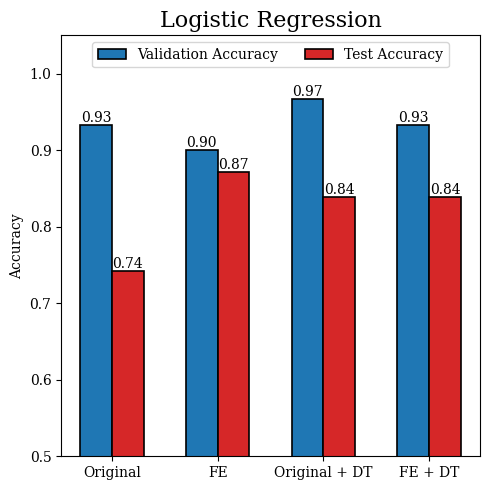


=== Lưu mô hình Logistic Regression ===
Đã lưu mô hình: raw_lr_20250929_184440
Validation Accuracy: 0.9333
Test Accuracy: 0.7419
Đã lưu mô hình: fe_lr_20250929_184440
Validation Accuracy: 0.9000
Test Accuracy: 0.8710
Đã lưu mô hình: dt_lr_20250929_184440
Validation Accuracy: 0.9667
Test Accuracy: 0.8387
Đã lưu mô hình: fe_dt_lr_20250929_184440
Validation Accuracy: 0.9333
Test Accuracy: 0.8387


('../models/saved_models/fe_dt_lr_20250929_184440.joblib',
 '../models/saved_models/fe_dt_lr_20250929_184440_scaler.joblib',
 '../models/saved_models/fe_dt_lr_20250929_184440.json')

In [15]:
# Vẽ biểu đồ so sánh hiệu suất Logistic Regression trên các tập dữ liệu

plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [lr_val_acc, lr_val_fe_acc, lr_val_dt_acc, lr_val_fe_dt_acc]
test_accs = [lr_test_acc, lr_test_fe_acc, lr_test_dt_acc, lr_test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs, width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Save to results/figures
save_dir = '../results/figures'
os.makedirs(save_dir, exist_ok=True)
fig.savefig(f'{save_dir}/logistic_regression_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig(f'{save_dir}/logistic_regression_comparison.pdf', bbox_inches='tight')
print(f"Saved figures to {save_dir}/")

plt.show()

# Lưu mô hình Logistic Regression
print("\n=== Lưu mô hình Logistic Regression ===")
save_model_with_metadata(lr_model, lr_scaler, 'lr', 'raw', lr_val_acc, lr_test_acc, lr_best_params)
save_model_with_metadata(lr_model_fe, lr_scaler_fe, 'lr', 'fe', lr_val_fe_acc, lr_test_fe_acc, lr_best_params_fe)
save_model_with_metadata(lr_model_dt, lr_scaler_dt, 'lr', 'dt', lr_val_dt_acc, lr_test_dt_acc, lr_best_params_dt)
save_model_with_metadata(lr_model_fe_dt, lr_scaler_fe_dt, 'lr', 'fe_dt', lr_val_fe_dt_acc, lr_test_fe_dt_acc, lr_best_params_fe_dt)


## 4.AdaBoost (AB)

In [47]:
def find_optimal_knn(X_train, y_train, cv_splits=5):
    """Tìm tham số tối ưu cho K-Nearest Neighbors"""
    # Chuẩn hóa dữ liệu cho KNN
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Grid search cho tham số
    param_grid = {
        'n_neighbors': list(range(1, 21)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    grid_search = GridSearchCV(
        KNeighborsClassifier(),
        param_grid, cv=cv, scoring='accuracy', n_jobs=-1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f'Tham số tối ưu: {best_params}')
    print(f'CV Score: {best_score:.4f}')
    
    return best_model, scaler, best_params, best_score

In [48]:
def evaluate_val_knn(X_train, y_train, X_val, y_val, cv_splits=5):
    print('Tìm tham số tối ưu cho K-Nearest Neighbors...')
    knn_model, scaler, best_params, cv_acc = find_optimal_knn(X_train, y_train, cv_splits)
    
    # Chuẩn hóa validation set
    X_val_scaled = scaler.transform(X_val)
    val_pred = knn_model.predict(X_val_scaled)
    val_acc = accuracy_score(y_val, val_pred)
    
    print(f'\nĐộ chính xác KNN trên tập validation: {val_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_val, val_pred))
    return knn_model, scaler, val_acc, best_params

def evaluate_test_knn(knn_model, scaler, X_test, y_test):
    # Chuẩn hóa test set
    X_test_scaled = scaler.transform(X_test)
    test_pred = knn_model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, test_pred)
    
    print(f'\nĐộ chính xác KNN trên tập test: {test_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, test_pred))
    return test_acc

In [ ]:
# KNN on FE Dataset
print("\n=== K-Nearest Neighbors trên FE Dataset ===")
knn_model_fe, knn_scaler_fe, knn_val_fe_acc, knn_best_params_fe = evaluate_val_knn(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val
)
knn_test_fe_acc = evaluate_test_knn(knn_model_fe, knn_scaler_fe, X_fe_test, y_fe_test)

# KNN on Original + DT Dataset
print("\n=== K-Nearest Neighbors trên Original + DT Dataset ===")
knn_model_dt, knn_scaler_dt, knn_val_dt_acc, knn_best_params_dt = evaluate_val_knn(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val
)
knn_test_dt_acc = evaluate_test_knn(knn_model_dt, knn_scaler_dt, X_dt_test, y_dt_test)

# KNN on FE + DT Dataset
print("\n=== K-Nearest Neighbors trên FE + DT Dataset ===")
knn_model_fe_dt, knn_scaler_fe_dt, knn_val_fe_dt_acc, knn_best_params_fe_dt = evaluate_val_knn(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val
)
knn_test_fe_dt_acc = evaluate_test_knn(knn_model_fe_dt, knn_scaler_fe_dt, X_fe_dt_test, y_fe_dt_test)


=== K-Nearest Neighbors trên Original Dataset ===
Tìm tham số tối ưu cho K-Nearest Neighbors...
Tham số tối ưu: {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
CV Score: 0.8514

Độ chính xác KNN trên tập validation: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Độ chính xác KNN trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.76      0.93      0.84        14

    accuracy                           0.84        31
   macro avg       0.85      0.85      0.84        31
weighted avg       0.85      0.84      0.84        31


=== K-Nearest Neigh

Saved figures to ../results/figures/


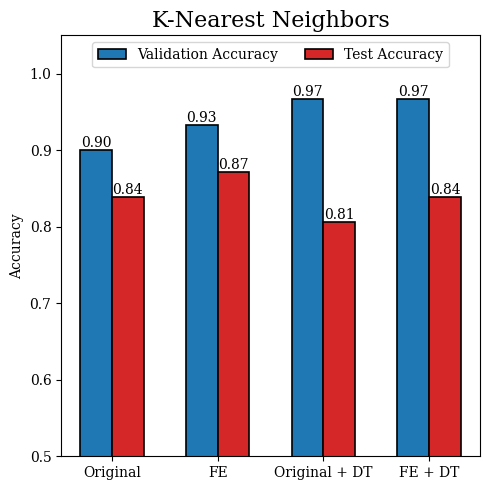


=== Lưu mô hình K-Nearest Neighbors ===
Đã lưu mô hình: raw_knn_20250929_190127
Validation Accuracy: 0.9000
Test Accuracy: 0.8387
Đã lưu mô hình: fe_knn_20250929_190127
Validation Accuracy: 0.9333
Test Accuracy: 0.8710
Đã lưu mô hình: dt_knn_20250929_190127
Validation Accuracy: 0.9667
Test Accuracy: 0.8065
Đã lưu mô hình: fe_dt_knn_20250929_190127
Validation Accuracy: 0.9667
Test Accuracy: 0.8387


('../models/saved_models/fe_dt_knn_20250929_190127.joblib',
 '../models/saved_models/fe_dt_knn_20250929_190127_scaler.joblib',
 '../models/saved_models/fe_dt_knn_20250929_190127.json')

In [50]:
# Vẽ biểu đồ so sánh hiệu suất KNN trên các tập dữ liệu
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [knn_val_acc, knn_val_fe_acc, knn_val_dt_acc, knn_val_fe_dt_acc]
test_accs = [knn_test_acc, knn_test_fe_acc, knn_test_dt_acc, knn_test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs, width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('K-Nearest Neighbors', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Save to results/figures
save_dir = '../results/figures'
os.makedirs(save_dir, exist_ok=True)
fig.savefig(f'{save_dir}/knn_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig(f'{save_dir}/knn_comparison.pdf', bbox_inches='tight')
print(f"Saved figures to {save_dir}/")

plt.show()

# Lưu mô hình KNN
print("\n=== Lưu mô hình K-Nearest Neighbors ===")
save_model_with_metadata(knn_model, knn_scaler, 'knn', 'raw', knn_val_acc, knn_test_acc, knn_best_params)
save_model_with_metadata(knn_model_fe, knn_scaler_fe, 'knn', 'fe', knn_val_fe_acc, knn_test_fe_acc, knn_best_params_fe)
save_model_with_metadata(knn_model_dt, knn_scaler_dt, 'knn', 'dt', knn_val_dt_acc, knn_test_dt_acc, knn_best_params_dt)
save_model_with_metadata(knn_model_fe_dt, knn_scaler_fe_dt, 'knn', 'fe_dt', knn_val_fe_dt_acc, knn_test_fe_dt_acc, knn_best_params_fe_dt)


In [23]:
def find_optimal_dt(X_train, y_train, cv_splits=5):
    """Tìm tham số tối ưu cho Decision Tree"""
    # Grid search cho tham số
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': list(range(1, 11)),
        'min_samples_leaf': [1, 5, 10]
    }
    
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    grid_search = GridSearchCV(
        DecisionTreeClassifier(random_state=SEED),
        param_grid, cv=cv, scoring='accuracy', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f'Tham số tối ưu: {best_params}')
    print(f'CV Score: {best_score:.4f}')
    
    return best_model, best_params, best_score

def evaluate_val_dt(X_train, y_train, X_val, y_val, cv_splits=5):
    print('Tìm tham số tối ưu cho Decision Tree...')
    dt_model, best_params, cv_acc = find_optimal_dt(X_train, y_train, cv_splits)
    
    val_pred = dt_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    
    print(f'\nĐộ chính xác Decision Tree trên tập validation: {val_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_val, val_pred))
    return dt_model, val_acc, best_params

def evaluate_test_dt(dt_model, X_test, y_test):
    test_pred = dt_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    
    print(f'\nĐộ chính xác Decision Tree trên tập test: {test_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, test_pred))
    return test_acc


In [24]:
# Decision Tree trên các dataset
print("=== Decision Tree trên Original Dataset ===")
dt_model, dt_val_acc, dt_best_params = evaluate_val_dt(X_train, y_train, X_val, y_val)
dt_test_acc = evaluate_test_dt(dt_model, X_test, y_test)

print("\n=== Decision Tree trên FE Dataset ===")
dt_model_fe, dt_val_fe_acc, dt_best_params_fe = evaluate_val_dt(X_fe_train, y_fe_train, X_fe_val, y_fe_val)
dt_test_fe_acc = evaluate_test_dt(dt_model_fe, X_fe_test, y_fe_test)

print("\n=== Decision Tree trên Original + DT Dataset ===")
dt_model_dt, dt_val_dt_acc, dt_best_params_dt = evaluate_val_dt(X_dt_train, y_dt_train, X_dt_val, y_dt_val)
dt_test_dt_acc = evaluate_test_dt(dt_model_dt, X_dt_test, y_dt_test)

print("\n=== Decision Tree trên FE + DT Dataset ===")
dt_model_fe_dt, dt_val_fe_dt_acc, dt_best_params_fe_dt = evaluate_val_dt(X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val)
dt_test_fe_dt_acc = evaluate_test_dt(dt_model_fe_dt, X_fe_dt_test, y_fe_dt_test)


=== Decision Tree trên Original Dataset ===
Tìm tham số tối ưu cho Decision Tree...
Tham số tối ưu: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
CV Score: 0.7974

Độ chính xác Decision Tree trên tập validation: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Độ chính xác Decision Tree trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31


=== Decision T

Saved figures to ../results/figures/


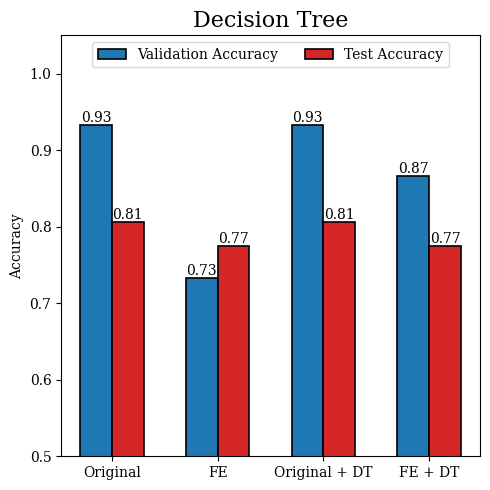


=== Lưu mô hình Decision Tree ===
Đã lưu mô hình: raw_dt_20250929_184756
Validation Accuracy: 0.9333
Test Accuracy: 0.8065
Đã lưu mô hình: fe_dt_20250929_184756
Validation Accuracy: 0.7333
Test Accuracy: 0.7742
Đã lưu mô hình: dt_dt_20250929_184756
Validation Accuracy: 0.9333
Test Accuracy: 0.8065
Đã lưu mô hình: fe_dt_dt_20250929_184756
Validation Accuracy: 0.8667
Test Accuracy: 0.7742


('../models/saved_models/fe_dt_dt_20250929_184756.joblib',
 None,
 '../models/saved_models/fe_dt_dt_20250929_184756.json')

In [25]:
# Vẽ biểu đồ so sánh hiệu suất Decision Tree trên các tập dữ liệu
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [dt_val_acc, dt_val_fe_acc, dt_val_dt_acc, dt_val_fe_dt_acc]
test_accs = [dt_test_acc, dt_test_fe_acc, dt_test_dt_acc, dt_test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs, width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('Decision Tree', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Save to results/figures
save_dir = '../results/figures'
os.makedirs(save_dir, exist_ok=True)
fig.savefig(f'{save_dir}/decision_tree_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig(f'{save_dir}/decision_tree_comparison.pdf', bbox_inches='tight')
print(f"Saved figures to {save_dir}/")

plt.show()

# Lưu mô hình Decision Tree
print("\n=== Lưu mô hình Decision Tree ===")
save_model_with_metadata(dt_model, None, 'dt', 'raw', dt_val_acc, dt_test_acc, dt_best_params)
save_model_with_metadata(dt_model_fe, None, 'dt', 'fe', dt_val_fe_acc, dt_test_fe_acc, dt_best_params_fe)
save_model_with_metadata(dt_model_dt, None, 'dt', 'dt', dt_val_dt_acc, dt_test_dt_acc, dt_best_params_dt)
save_model_with_metadata(dt_model_fe_dt, None, 'dt', 'fe_dt', dt_val_fe_dt_acc, dt_test_fe_dt_acc, dt_best_params_fe_dt)


In [30]:
def find_optimal_rf(
    X_train, y_train, n_estimators_range=range(50, 501, 50), cv_splits=3,
    max_depth=5, min_samples_split=2, min_samples_leaf=1,
    max_features='sqrt', bootstrap=True, class_weight=None
):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []
    for n in n_estimators_range:
        rf = RandomForestClassifier(
            n_estimators=n, max_depth=max_depth, min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf, max_features=max_features,
            bootstrap=bootstrap, class_weight=class_weight, n_jobs=-1, random_state=SEED
        )
        cv_score = cross_val_score(rf, X_train, y_train,
                                   cv=cv, scoring='accuracy', n_jobs=-1)
        scores.append(cv_score.mean())
    
    plt.figure(figsize=(10, 6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title(f'Chọn n_estimators tối ưu cho Random Forest (CV={cv_splits}-fold)')
    plt.xlabel('n_estimators')
    plt.ylabel('Cross-Validation Accuracy')
    plt.grid(True)
    plt.show()
    
    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f'n_estimators tối ưu (CV): {best_n}')
    
    best_model = RandomForestClassifier(
        n_estimators=best_n, max_depth=max_depth, min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf, max_features=max_features,
        bootstrap=bootstrap, class_weight=class_weight, n_jobs=-1, random_state=SEED
    )
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

def evaluate_val_rf(X_train, y_train, X_val, y_val,
                    n_estimators_range=range(50, 501, 50), cv_splits=5, max_depth=5,
                    min_samples_split=2, min_samples_leaf=1, max_features='sqrt',
                    bootstrap=True, class_weight=None):
    print('Tìm n_estimators tối ưu cho Random Forest...')
    rf_model, best_n, cv_acc = find_optimal_rf(
        X_train, y_train, n_estimators_range=n_estimators_range, cv_splits=cv_splits,
        max_depth=max_depth, min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf, max_features=max_features,
        bootstrap=bootstrap, class_weight=class_weight
    )
    
    val_pred = rf_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    print(f'\nĐộ chính xác Random Forest trên tập validation: {val_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_val, val_pred))
    return rf_model, val_acc, {'n_estimators': best_n}

def evaluate_test_rf(rf_model, X_test, y_test):
    test_pred = rf_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print(f'\nĐộ chính xác Random Forest trên tập test: {test_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, test_pred))
    return test_acc


=== Random Forest trên Original Dataset ===
Tìm n_estimators tối ưu cho Random Forest...


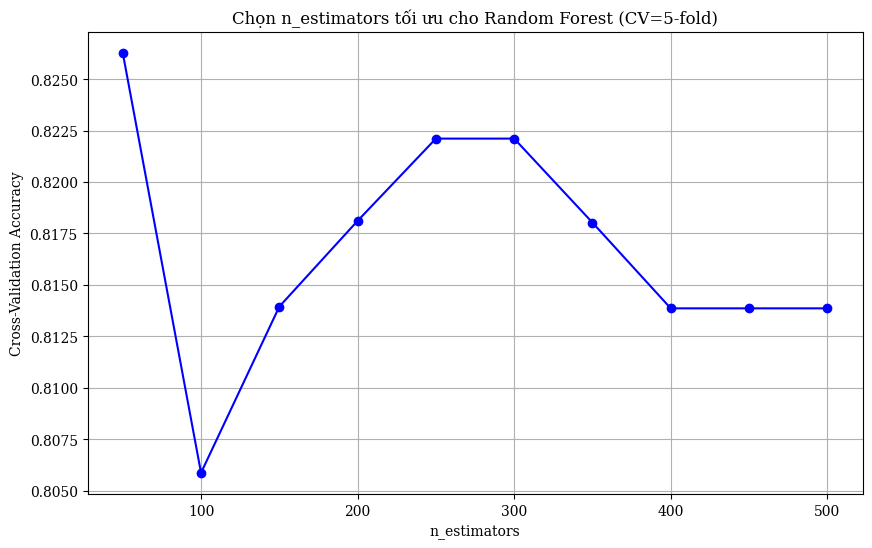

n_estimators tối ưu (CV): 50

Độ chính xác Random Forest trên tập validation: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Độ chính xác Random Forest trên tập test: 0.9032
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.87      0.93      0.90        14

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31


=== Random Forest trên FE Dataset ===
Tìm n_estimators tối ưu cho Random Forest...


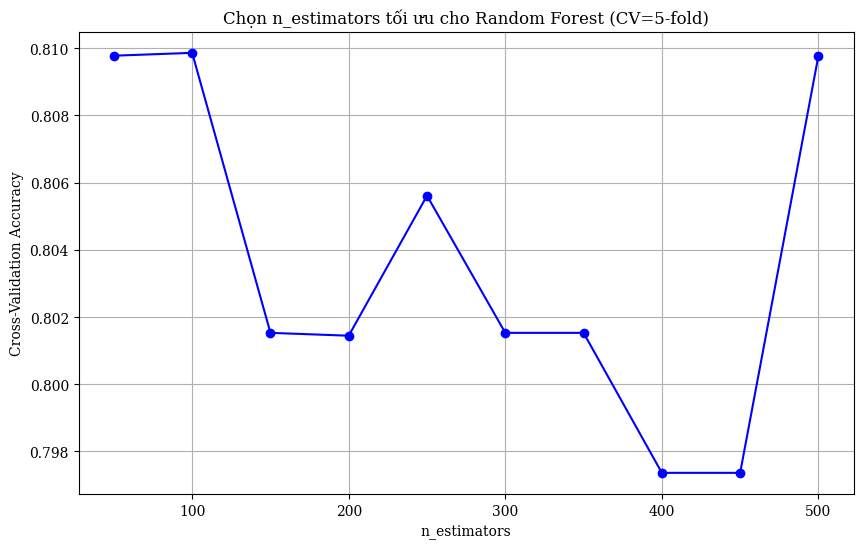

n_estimators tối ưu (CV): 100

Độ chính xác Random Forest trên tập validation: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.82      1.00      0.90        14

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30


Độ chính xác Random Forest trên tập test: 0.8710
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31


=== Random Forest trên Original + DT Dataset ===
Tìm n_estimators tối ưu cho Random Forest...


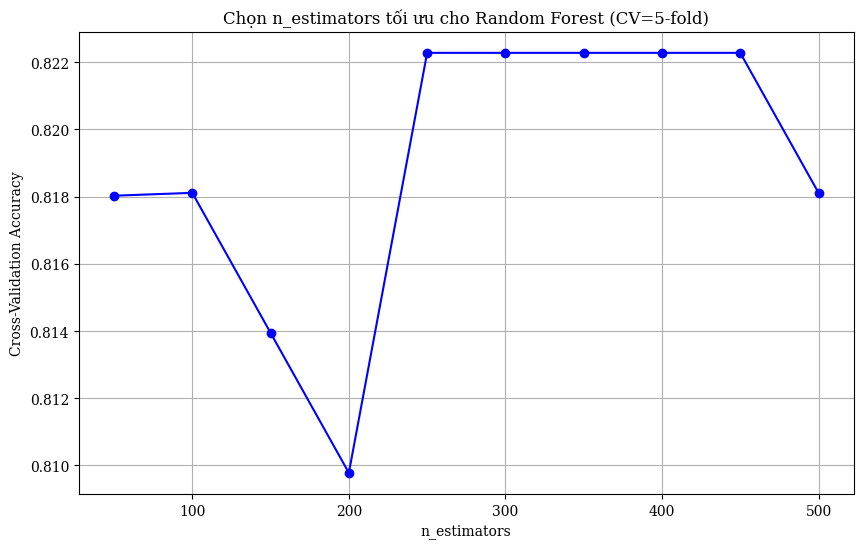

n_estimators tối ưu (CV): 250

Độ chính xác Random Forest trên tập validation: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Độ chính xác Random Forest trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31


=== Random Forest trên FE + DT Dataset ===
Tìm n_estimators tối ưu cho Random Forest...


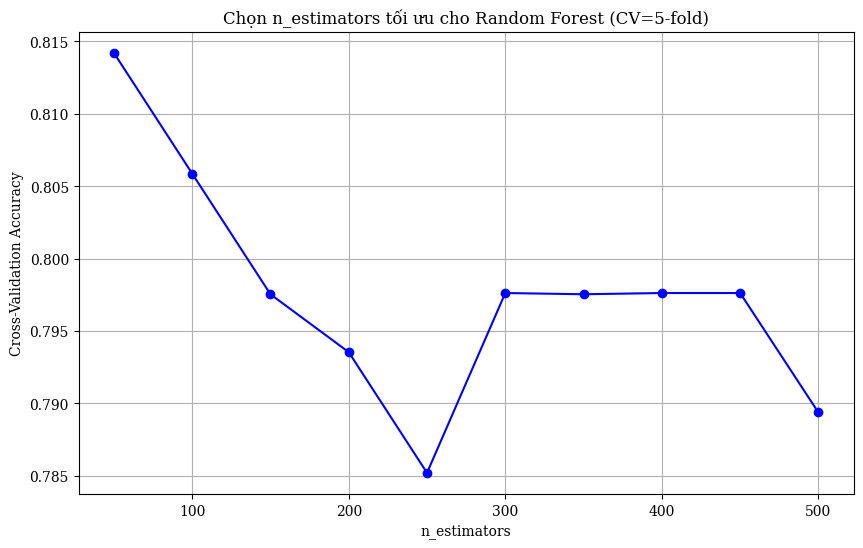

n_estimators tối ưu (CV): 50

Độ chính xác Random Forest trên tập validation: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Độ chính xác Random Forest trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [31]:
# Huấn luyện và đánh giá Random Forest trên các tập dữ liệu

# RF on Original Dataset
print("=== Random Forest trên Original Dataset ===")
rf_model, rf_val_acc, rf_best_params = evaluate_val_rf(
    X_train, y_train, X_val, y_val
)
rf_test_acc = evaluate_test_rf(rf_model, X_test, y_test)

# RF on Feature Engineering Dataset
print("\n=== Random Forest trên FE Dataset ===")
rf_model_fe, rf_val_fe_acc, rf_best_params_fe = evaluate_val_rf(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val
)
rf_test_fe_acc = evaluate_test_rf(rf_model_fe, X_fe_test, y_fe_test)

# RF on Original + DT Dataset
print("\n=== Random Forest trên Original + DT Dataset ===")
rf_model_dt, rf_val_dt_acc, rf_best_params_dt = evaluate_val_rf(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val
)
rf_test_dt_acc = evaluate_test_rf(rf_model_dt, X_dt_test, y_dt_test)

# RF on Feature Engineering + DT Dataset
print("\n=== Random Forest trên FE + DT Dataset ===")
rf_model_fe_dt, rf_val_fe_dt_acc, rf_best_params_fe_dt = evaluate_val_rf(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val
)
rf_test_fe_dt_acc = evaluate_test_rf(rf_model_fe_dt, X_fe_dt_test, y_fe_dt_test)


Saved figures to ../results/figures/


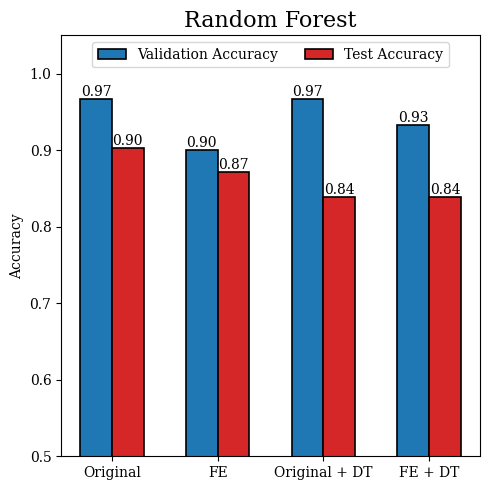


=== Lưu mô hình Random Forest ===
Đã lưu mô hình: raw_rf_20250929_185144
Validation Accuracy: 0.9667
Test Accuracy: 0.9032
Đã lưu mô hình: fe_rf_20250929_185145
Validation Accuracy: 0.9000
Test Accuracy: 0.8710
Đã lưu mô hình: dt_rf_20250929_185153
Validation Accuracy: 0.9667
Test Accuracy: 0.8387
Đã lưu mô hình: fe_dt_rf_20250929_185200
Validation Accuracy: 0.9333
Test Accuracy: 0.8387


('../models/saved_models/fe_dt_rf_20250929_185200.joblib',
 None,
 '../models/saved_models/fe_dt_rf_20250929_185200.json')

In [32]:
# Vẽ biểu đồ so sánh hiệu suất Random Forest trên các tập dữ liệu
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [rf_val_acc, rf_val_fe_acc, rf_val_dt_acc, rf_val_fe_dt_acc]
test_accs = [rf_test_acc, rf_test_fe_acc, rf_test_dt_acc, rf_test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs, width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Save to results/figures
save_dir = '../results/figures'
os.makedirs(save_dir, exist_ok=True)
fig.savefig(f'{save_dir}/random_forest_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig(f'{save_dir}/random_forest_comparison.pdf', bbox_inches='tight')
print(f"Saved figures to {save_dir}/")

plt.show()

# Lưu mô hình Random Forest
print("\n=== Lưu mô hình Random Forest ===")
save_model_with_metadata(rf_model, None, 'rf', 'raw', rf_val_acc, rf_test_acc, rf_best_params)
save_model_with_metadata(rf_model_fe, None, 'rf', 'fe', rf_val_fe_acc, rf_test_fe_acc, rf_best_params_fe)
save_model_with_metadata(rf_model_dt, None, 'rf', 'dt', rf_val_dt_acc, rf_test_dt_acc, rf_best_params_dt)
save_model_with_metadata(rf_model_fe_dt, None, 'rf', 'fe_dt', rf_val_fe_dt_acc, rf_test_fe_dt_acc, rf_best_params_fe_dt)


In [33]:
def find_optimal_ada(
    X_train, y_train, n_estimators_range=range(50, 501, 50), cv_splits=3,
    learning_rate=0.1, base_max_depth=1, algorithm="SAMME"
):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []

    for n_est in n_estimators_range:
        ada = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=base_max_depth, random_state=SEED),
            n_estimators=n_est, 
            learning_rate=learning_rate,
            algorithm=algorithm, 
            random_state=SEED
        )
        cv_score = cross_val_score(ada, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
        scores.append(cv_score.mean())

    plt.figure(figsize=(10, 6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title(f'Chọn n_estimators tối ưu cho AdaBoost (CV={cv_splits}-fold)')
    plt.xlabel('n_estimators')
    plt.ylabel('Cross-Validation Accuracy')
    plt.grid(True)
    plt.show()

    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f'n_estimators tối ưu (CV): {best_n}')

    best_model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=base_max_depth, random_state=SEED),
        n_estimators=best_n, 
        learning_rate=learning_rate,
        algorithm=algorithm, 
        random_state=SEED
    )
    
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

def evaluate_val_ada(X_train, y_train, X_val, y_val,
                    n_estimators_range=range(50, 501, 50), 
                    cv_splits=3, 
                    learning_rate=0.1,
                    base_max_depth=1,
                    algorithm="SAMME"):
    print("Tìm n_estimators tối ưu cho Adaboost...")
    ada_model, best_n, cv_acc = find_optimal_ada(
        X_train, y_train, n_estimators_range=n_estimators_range, cv_splits=cv_splits,
        learning_rate=learning_rate, base_max_depth=base_max_depth, algorithm=algorithm
    )

    val_pred = ada_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    print(f"Độ chính xác AdaBoost trên tập validation: {val_acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_val, val_pred))
    
    return ada_model, val_acc, {"n_estimators": best_n}

def evaluate_test_ada(ada_model, X_test, y_test):
    test_pred = ada_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print(f"Độ chính xác AdaBoost trên tập test: {test_acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, test_pred))

    return test_acc


=== AdaBoost trên Original Dataset ===
Tìm n_estimators tối ưu cho Adaboost...


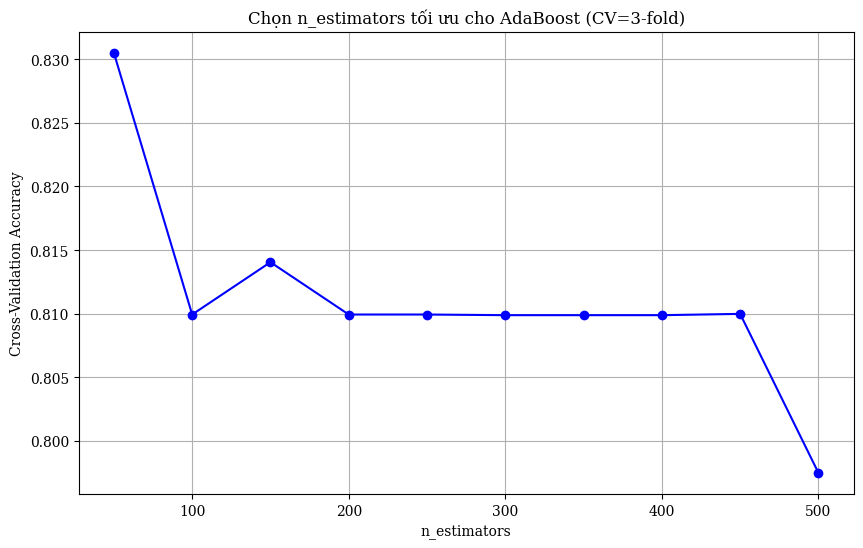

n_estimators tối ưu (CV): 50
Độ chính xác AdaBoost trên tập validation: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Độ chính xác AdaBoost trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31


=== AdaBoost trên FE Dataset ===
Tìm n_estimators tối ưu cho Adaboost...


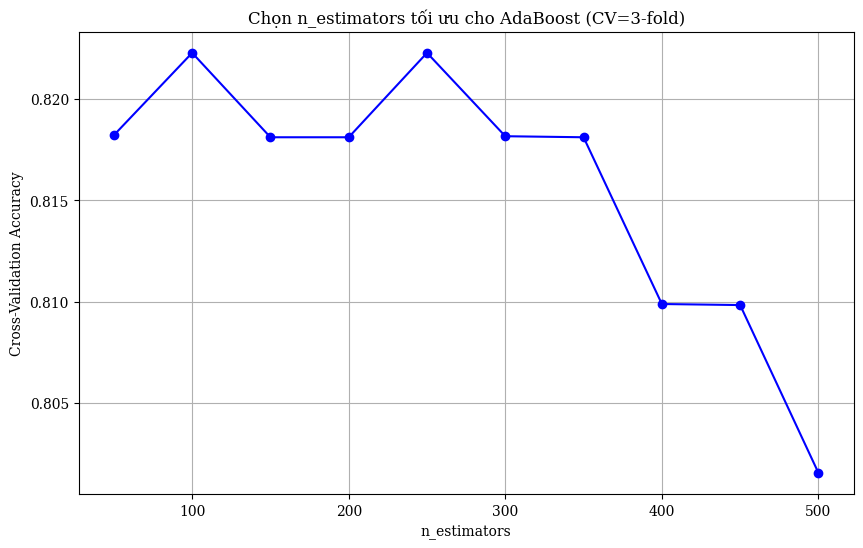

n_estimators tối ưu (CV): 100
Độ chính xác AdaBoost trên tập validation: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Độ chính xác AdaBoost trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31


=== AdaBoost trên Original + DT Dataset ===
Tìm n_estimators tối ưu cho Adaboost...


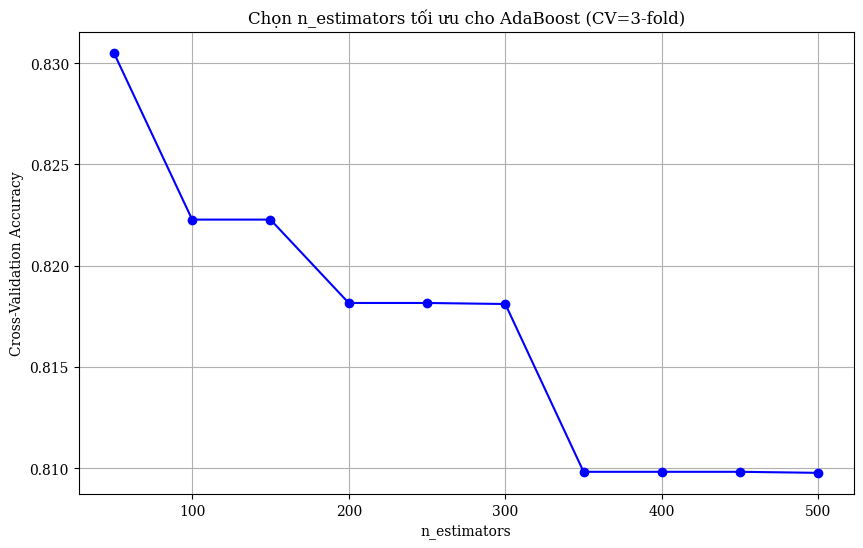

n_estimators tối ưu (CV): 50
Độ chính xác AdaBoost trên tập validation: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Độ chính xác AdaBoost trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31


=== AdaBoost trên FE + DT Dataset ===
Tìm n_estimators tối ưu cho Adaboost...


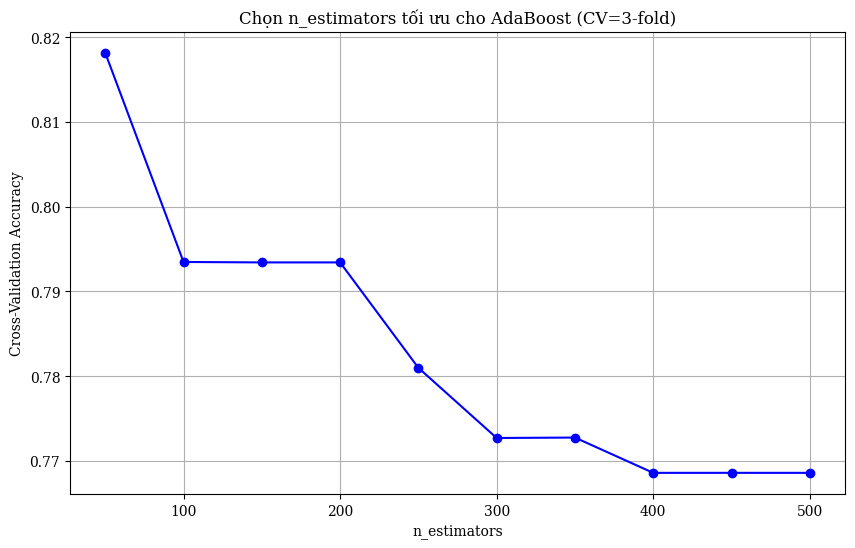

n_estimators tối ưu (CV): 50
Độ chính xác AdaBoost trên tập validation: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Độ chính xác AdaBoost trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [34]:
# AdaBoost trên các dataset
print("=== AdaBoost trên Original Dataset ===")
ada_model, ada_val_acc, ada_best_params = evaluate_val_ada(
    X_train, y_train, X_val, y_val
)
ada_test_acc = evaluate_test_ada(ada_model, X_test, y_test)

print("\n=== AdaBoost trên FE Dataset ===")
ada_model_fe, ada_val_fe_acc, ada_best_params_fe = evaluate_val_ada(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val
)
ada_test_fe_acc = evaluate_test_ada(ada_model_fe, X_fe_test, y_fe_test)

print("\n=== AdaBoost trên Original + DT Dataset ===")
ada_model_dt, ada_val_dt_acc, ada_best_params_dt = evaluate_val_ada(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val
)
ada_test_dt_acc = evaluate_test_ada(ada_model_dt, X_dt_test, y_dt_test)

print("\n=== AdaBoost trên FE + DT Dataset ===")
ada_model_fe_dt, ada_val_fe_dt_acc, ada_best_params_fe_dt = evaluate_val_ada(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val
)
ada_test_fe_dt_acc = evaluate_test_ada(ada_model_fe_dt, X_fe_dt_test, y_fe_dt_test)


Saved figures to ../results/figures/


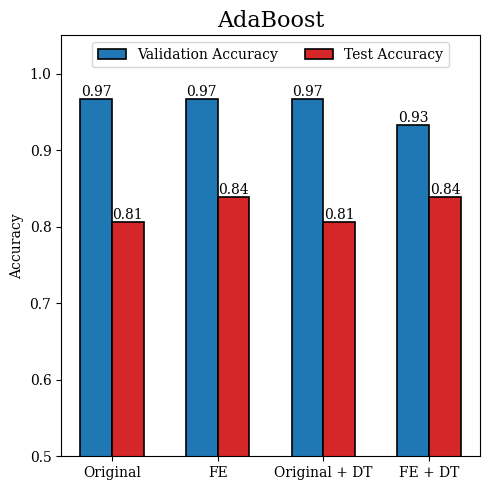


=== Lưu mô hình AdaBoost ===
Đã lưu mô hình: raw_ada_20250929_185530
Validation Accuracy: 0.9667
Test Accuracy: 0.8065
Đã lưu mô hình: fe_ada_20250929_185530
Validation Accuracy: 0.9667
Test Accuracy: 0.8387
Đã lưu mô hình: dt_ada_20250929_185530
Validation Accuracy: 0.9667
Test Accuracy: 0.8065
Đã lưu mô hình: fe_dt_ada_20250929_185530
Validation Accuracy: 0.9333
Test Accuracy: 0.8387


('../models/saved_models/fe_dt_ada_20250929_185530.joblib',
 None,
 '../models/saved_models/fe_dt_ada_20250929_185530.json')

In [35]:
# Vẽ biểu đồ so sánh hiệu suất AdaBoost trên các tập dữ liệu
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [ada_val_acc, ada_val_fe_acc, ada_val_dt_acc, ada_val_fe_dt_acc]
test_accs = [ada_test_acc, ada_test_fe_acc, ada_test_dt_acc, ada_test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs, width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('AdaBoost', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Save to results/figures
save_dir = '../results/figures'
os.makedirs(save_dir, exist_ok=True)
fig.savefig(f'{save_dir}/adaboost_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig(f'{save_dir}/adaboost_comparison.pdf', bbox_inches='tight')
print(f"Saved figures to {save_dir}/")

plt.show()

# Lưu mô hình AdaBoost
print("\n=== Lưu mô hình AdaBoost ===")
save_model_with_metadata(ada_model, None, 'ada', 'raw', ada_val_acc, ada_test_acc, ada_best_params)
save_model_with_metadata(ada_model_fe, None, 'ada', 'fe', ada_val_fe_acc, ada_test_fe_acc, ada_best_params_fe)
save_model_with_metadata(ada_model_dt, None, 'ada', 'dt', ada_val_dt_acc, ada_test_dt_acc, ada_best_params_dt)
save_model_with_metadata(ada_model_fe_dt, None, 'ada', 'fe_dt', ada_val_fe_dt_acc, ada_test_fe_dt_acc, ada_best_params_fe_dt)


## 8. Gradient Boosting


In [40]:
def find_optimal_gb(
    X_train, y_train, n_estimators_range=range(50, 501, 50), cv_splits=3
):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []
    for n in n_estimators_range:
        gb = GradientBoostingClassifier(
            n_estimators=n, 
            learning_rate=0.1,
            max_depth=5,
            subsample=1.0,
            random_state=SEED
        )
        cv_score = cross_val_score(gb, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
        scores.append(cv_score.mean())

    plt.figure(figsize=(10, 6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title(f'Chọn n_estimators tối ưu cho Gradient Boosting (CV={cv_splits}-fold)')
    plt.xlabel('n_estimators')
    plt.ylabel('Cross-Validation Accuracy')
    plt.grid(True)
    plt.show()

    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f'n_estimators tối ưu (CV): {best_n}')

    best_model = GradientBoostingClassifier(
            n_estimators=best_n, 
            learning_rate=0.1,
            max_depth=5,
            subsample=1.0,
            random_state=SEED
        )
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

def evaluate_val_gb(X_train, y_train, X_val, y_val,
                    n_estimators_range=range(50, 501, 50),
                    cv_splits=3):
    print('Tìm n_estimators tối ưu cho Gradient Boosting...')
    gb_model, best_n, cv_acc = find_optimal_gb(
        X_train, y_train,
        n_estimators_range=n_estimators_range,
        cv_splits=cv_splits
    )
    
    val_pred = gb_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    print(f'\nĐộ chính xác GB trên tập validation: {val_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_val, val_pred))
    return gb_model, val_acc, {'n_estimators': best_n}

def evaluate_test_gb(gb_model, X_test, y_test):
    test_pred = gb_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print(f'\nĐộ chính xác GB trên tập test: {test_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, test_pred))
    return test_acc


=== Gradient Boosting trên Original Dataset ===
Tìm n_estimators tối ưu cho Gradient Boosting...


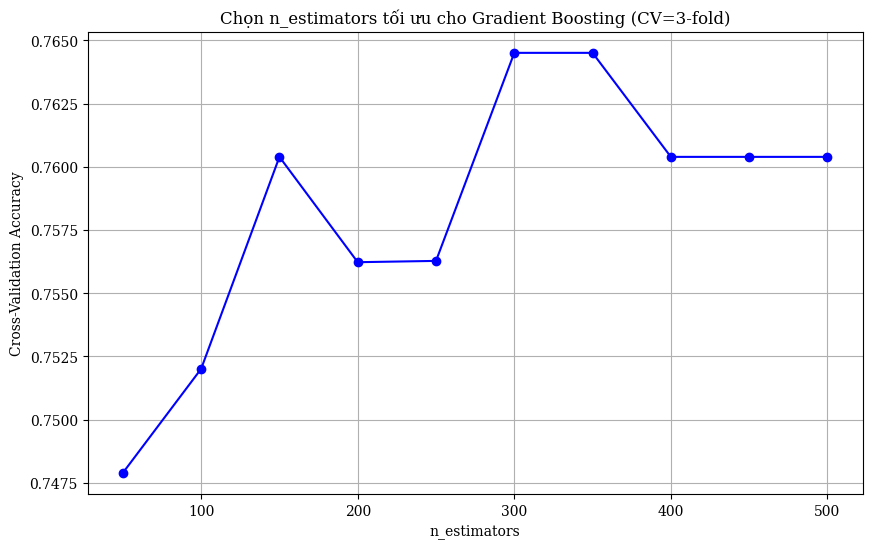

n_estimators tối ưu (CV): 300

Độ chính xác GB trên tập validation: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.78      1.00      0.88        14

    accuracy                           0.87        30
   macro avg       0.89      0.88      0.87        30
weighted avg       0.90      0.87      0.87        30


Độ chính xác GB trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.75      0.86      0.80        14

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31


=== Gradient Boosting trên FE Dataset ===
Tìm n_estimators tối ưu cho Gradient Boosting...


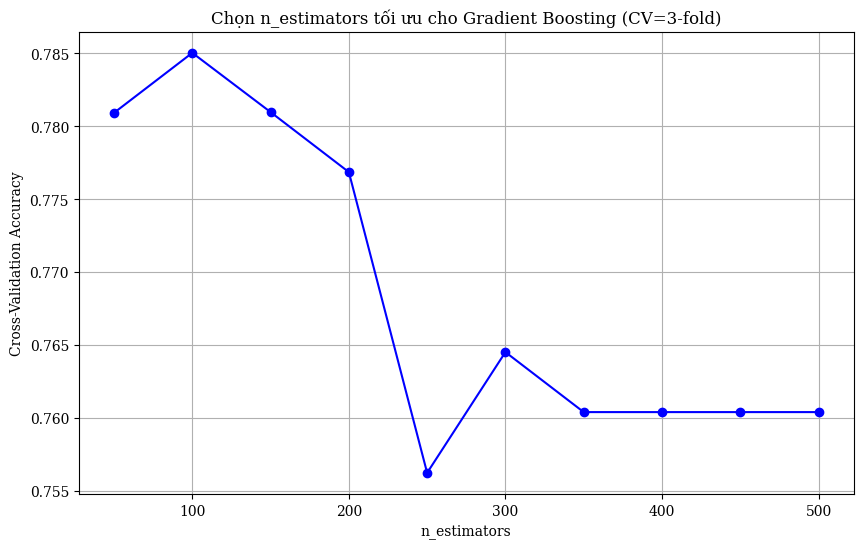

n_estimators tối ưu (CV): 100

Độ chính xác GB trên tập validation: 0.8333
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.80      0.86      0.83        14

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30


Độ chính xác GB trên tập test: 0.8710
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31


=== Gradient Boosting trên Original + DT Dataset ===
Tìm n_estimators tối ưu cho Gradient Boosting...


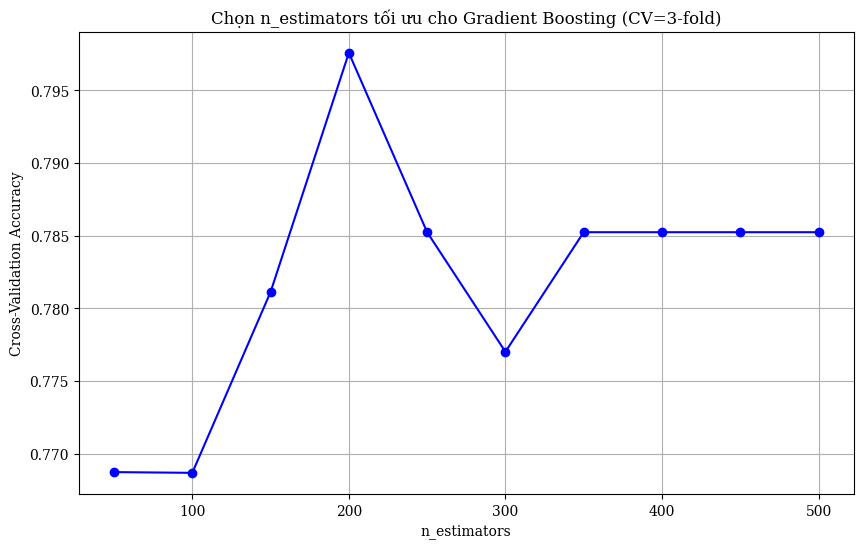

n_estimators tối ưu (CV): 200

Độ chính xác GB trên tập validation: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.81      0.93      0.87        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


Độ chính xác GB trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.75      0.86      0.80        14

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31


=== Gradient Boosting trên FE + DT Dataset ===
Tìm n_estimators tối ưu cho Gradient Boosting...


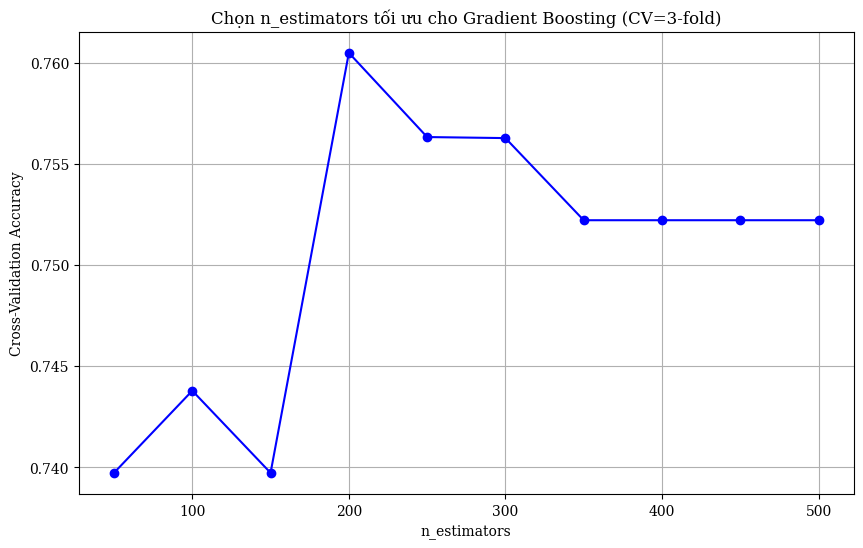

n_estimators tối ưu (CV): 200

Độ chính xác GB trên tập validation: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Độ chính xác GB trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [41]:
# Gradient Boosting trên các dataset
print("=== Gradient Boosting trên Original Dataset ===")
gb_model, gb_val_acc, gb_best_params = evaluate_val_gb(
    X_train, y_train, X_val, y_val
)
gb_test_acc = evaluate_test_gb(gb_model, X_test, y_test)

print("\n=== Gradient Boosting trên FE Dataset ===")
gb_model_fe, gb_val_fe_acc, gb_best_params_fe = evaluate_val_gb(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val
)
gb_test_fe_acc = evaluate_test_gb(gb_model_fe, X_fe_test, y_fe_test)

print("\n=== Gradient Boosting trên Original + DT Dataset ===")
gb_model_dt, gb_val_dt_acc, gb_best_params_dt = evaluate_val_gb(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val
)
gb_test_dt_acc = evaluate_test_gb(gb_model_dt, X_dt_test, y_dt_test)

print("\n=== Gradient Boosting trên FE + DT Dataset ===")
gb_model_fe_dt, gb_val_fe_dt_acc, gb_best_params_fe_dt = evaluate_val_gb(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val
)
gb_test_fe_dt_acc = evaluate_test_gb(gb_model_fe_dt, X_fe_dt_test, y_fe_dt_test)


Saved figures to ../results/figures/


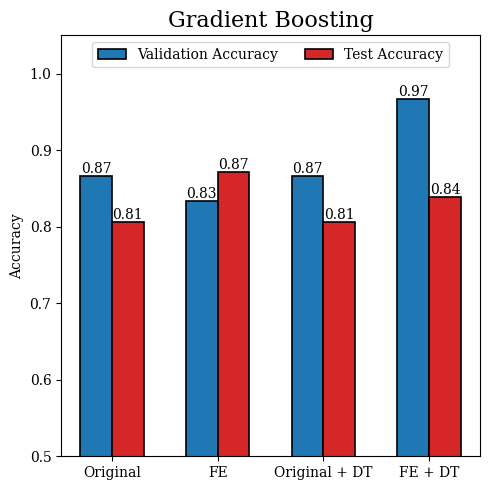


=== Lưu mô hình Gradient Boosting ===
Đã lưu mô hình: raw_gb_20250929_185725
Validation Accuracy: 0.8667
Test Accuracy: 0.8065
Đã lưu mô hình: fe_gb_20250929_185725
Validation Accuracy: 0.8333
Test Accuracy: 0.8710
Đã lưu mô hình: dt_gb_20250929_185725
Validation Accuracy: 0.8667
Test Accuracy: 0.8065
Đã lưu mô hình: fe_dt_gb_20250929_185725
Validation Accuracy: 0.9667
Test Accuracy: 0.8387


('../models/saved_models/fe_dt_gb_20250929_185725.joblib',
 None,
 '../models/saved_models/fe_dt_gb_20250929_185725.json')

In [42]:
# Vẽ biểu đồ so sánh hiệu suất Gradient Boosting trên các tập dữ liệu
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [gb_val_acc, gb_val_fe_acc, gb_val_dt_acc, gb_val_fe_dt_acc]
test_accs = [gb_test_acc, gb_test_fe_acc, gb_test_dt_acc, gb_test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs, width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('Gradient Boosting', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Save to results/figures
save_dir = '../results/figures'
os.makedirs(save_dir, exist_ok=True)
fig.savefig(f'{save_dir}/gradient_boosting_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig(f'{save_dir}/gradient_boosting_comparison.pdf', bbox_inches='tight')
print(f"Saved figures to {save_dir}/")

plt.show()

# Lưu mô hình Gradient Boosting
print("\n=== Lưu mô hình Gradient Boosting ===")
save_model_with_metadata(gb_model, None, 'gb', 'raw', gb_val_acc, gb_test_acc, gb_best_params)
save_model_with_metadata(gb_model_fe, None, 'gb', 'fe', gb_val_fe_acc, gb_test_fe_acc, gb_best_params_fe)
save_model_with_metadata(gb_model_dt, None, 'gb', 'dt', gb_val_dt_acc, gb_test_dt_acc, gb_best_params_dt)
save_model_with_metadata(gb_model_fe_dt, None, 'gb', 'fe_dt', gb_val_fe_dt_acc, gb_test_fe_dt_acc, gb_best_params_fe_dt)


## 9. XGBoost


In [43]:
def find_optimal_xgb(
    X_train, y_train, n_estimators_range=range(50, 501, 50), 
    cv_splits=3,
    learning_rate=0.1, max_depth=5, 
    subsample=1.0, use_gpu=False
):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []

    n_classes = len(np.unique(y_train))
    objective = 'binary:logistic' if n_classes == 2 else 'multi:softprob'
    eval_metric = 'logloss' if n_classes == 2 else 'mlogloss'

    for n in n_estimators_range:
        xgb = XGBClassifier(
            n_estimators=n, 
            learning_rate=learning_rate,
            max_depth=max_depth,
            subsample=subsample,
            objective=objective,
            eval_metric=eval_metric,
            n_jobs=-1,
            tree_method='gpu_hist' if use_gpu else 'hist',
            verbosity=0,
            random_state=SEED
        )
        cv_score = cross_val_score(xgb, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
        scores.append(cv_score.mean())

    plt.figure(figsize=(10, 6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title(f'Chọn n_estimators tối ưu cho XGBoost (CV={cv_splits}-fold)')
    plt.xlabel('n_estimators')
    plt.ylabel('Cross-Validation Accuracy')
    plt.grid(True)
    plt.show()

    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f'n_estimators tối ưu (CV): {best_n}')

    best_model = XGBClassifier(
            n_estimators=best_n, 
            learning_rate=learning_rate,
            max_depth=max_depth,
            subsample=subsample,
            objective=objective,
            eval_metric=eval_metric,
            n_jobs=-1,
            tree_method='gpu_hist' if use_gpu else 'hist',
            verbosity=0,
            random_state=SEED
        )
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

def evaluate_val_xgb(X_train, y_train, X_val, y_val,
                     n_estimators_range=range(50, 501, 50), cv_splits=3,
                     learning_rate=0.1, max_depth=5, subsample=1.0,
                     colsample_bytree=1.0, use_gpu=False):
    print('Tìm n_estimators tối ưu cho XGBoost...')
    xgb_model, best_n, cv_acc = find_optimal_xgb(
        X_train, y_train, n_estimators_range=n_estimators_range,
        cv_splits=cv_splits, learning_rate=learning_rate,
        max_depth=max_depth, subsample=subsample, use_gpu=use_gpu
    )
    
    val_pred = xgb_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    print(f'\nĐộ chính xác XGBoost trên tập validation: {val_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_val, val_pred))
    return xgb_model, val_acc, {'n_estimators': best_n}

def evaluate_test_xgb(xgb_model, X_test, y_test):
    test_pred = xgb_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print(f'\nĐộ chính xác XGBoost trên tập test: {test_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, test_pred))
    return test_acc


=== XGBoost trên Original Dataset ===
Tìm n_estimators tối ưu cho XGBoost...


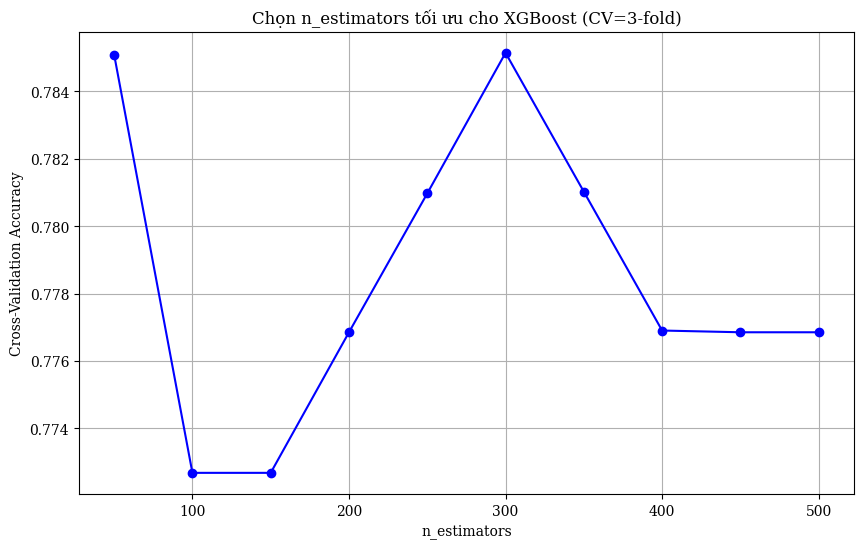

n_estimators tối ưu (CV): 300

Độ chính xác XGBoost trên tập validation: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.82      1.00      0.90        14

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30


Độ chính xác XGBoost trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.75      0.86      0.80        14

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31


=== XGBoost trên FE Dataset ===
Tìm n_estimators tối ưu cho XGBoost...


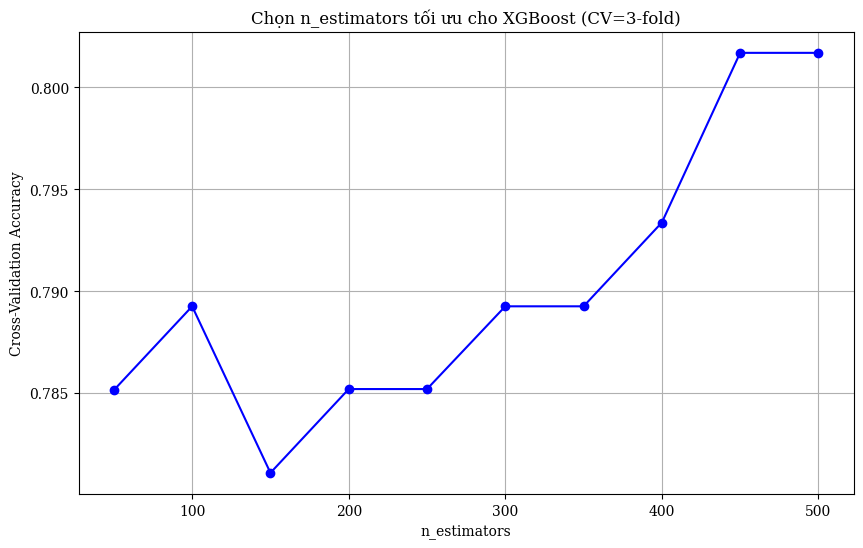

n_estimators tối ưu (CV): 450

Độ chính xác XGBoost trên tập validation: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.81      0.93      0.87        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


Độ chính xác XGBoost trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.85      0.79      0.81        14

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31


=== XGBoost trên Original + DT Dataset ===
Tìm n_estimators tối ưu cho XGBoost...


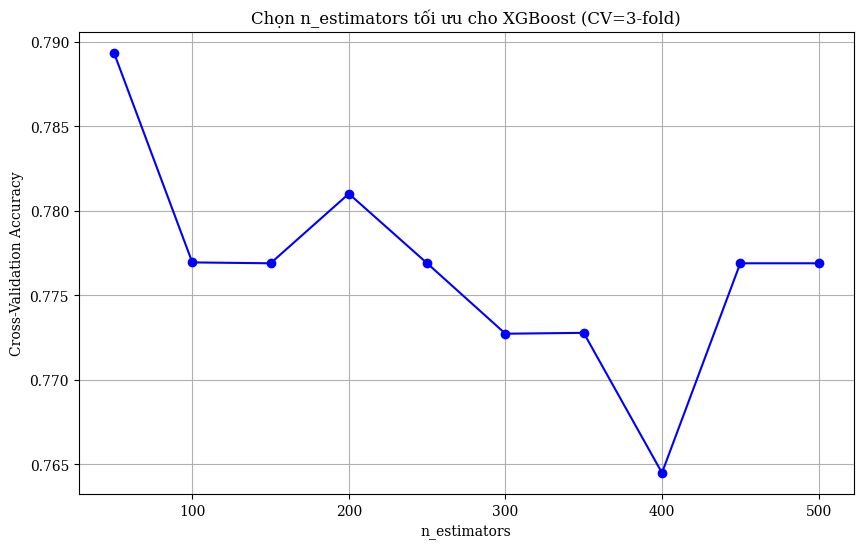

n_estimators tối ưu (CV): 50

Độ chính xác XGBoost trên tập validation: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30


Độ chính xác XGBoost trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31


=== XGBoost trên FE + DT Dataset ===
Tìm n_estimators tối ưu cho XGBoost...


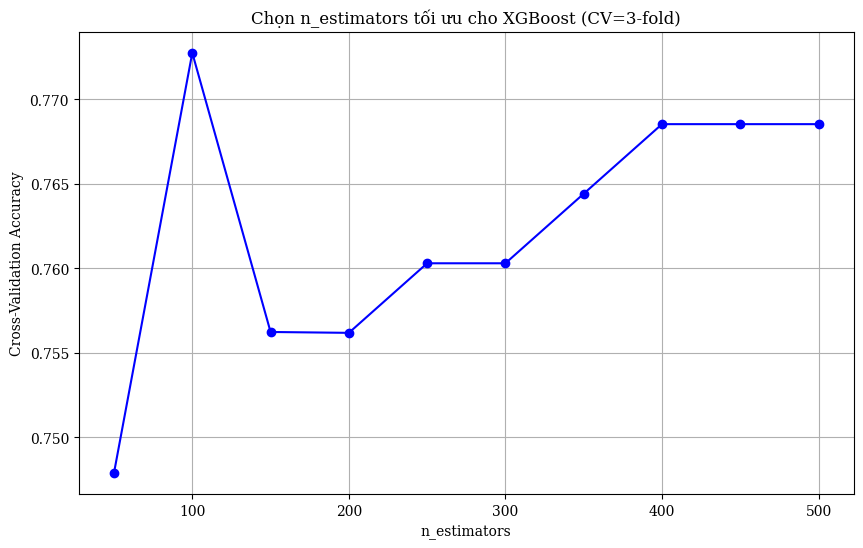

n_estimators tối ưu (CV): 100

Độ chính xác XGBoost trên tập validation: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.86      0.86      0.86        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


Độ chính xác XGBoost trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [44]:
# XGBoost trên các dataset
print("=== XGBoost trên Original Dataset ===")
xgb_model, xgb_val_acc, xgb_best_params = evaluate_val_xgb(
    X_train, y_train, X_val, y_val
)
xgb_test_acc = evaluate_test_xgb(xgb_model, X_test, y_test)

print("\n=== XGBoost trên FE Dataset ===")
xgb_model_fe, xgb_val_fe_acc, xgb_best_params_fe = evaluate_val_xgb(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val
)
xgb_test_fe_acc = evaluate_test_xgb(xgb_model_fe, X_fe_test, y_fe_test)

print("\n=== XGBoost trên Original + DT Dataset ===")
xgb_model_dt, xgb_val_dt_acc, xgb_best_params_dt = evaluate_val_xgb(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val
)
xgb_test_dt_acc = evaluate_test_xgb(xgb_model_dt, X_dt_test, y_dt_test)

print("\n=== XGBoost trên FE + DT Dataset ===")
xgb_model_fe_dt, xgb_val_fe_dt_acc, xgb_best_params_fe_dt = evaluate_val_xgb(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val
)
xgb_test_fe_dt_acc = evaluate_test_xgb(xgb_model_fe_dt, X_fe_dt_test, y_fe_dt_test)


Saved figures to ../results/figures/


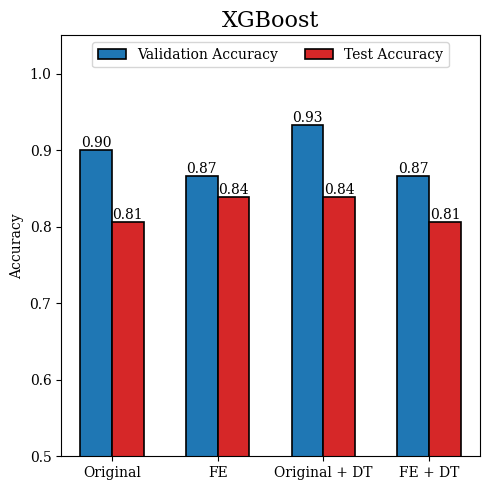


=== Lưu mô hình XGBoost ===
Đã lưu mô hình: raw_xgb_20250929_185814
Validation Accuracy: 0.9000
Test Accuracy: 0.8065
Đã lưu mô hình: fe_xgb_20250929_185814
Validation Accuracy: 0.8667
Test Accuracy: 0.8387
Đã lưu mô hình: dt_xgb_20250929_185814
Validation Accuracy: 0.9333
Test Accuracy: 0.8387
Đã lưu mô hình: fe_dt_xgb_20250929_185814
Validation Accuracy: 0.8667
Test Accuracy: 0.8065


('../models/saved_models/fe_dt_xgb_20250929_185814.joblib',
 None,
 '../models/saved_models/fe_dt_xgb_20250929_185814.json')

In [45]:
# Vẽ biểu đồ so sánh hiệu suất XGBoost trên các tập dữ liệu
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [xgb_val_acc, xgb_val_fe_acc, xgb_val_dt_acc, xgb_val_fe_dt_acc]
test_accs = [xgb_test_acc, xgb_test_fe_acc, xgb_test_dt_acc, xgb_test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs, width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('XGBoost', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Save to results/figures
save_dir = '../results/figures'
os.makedirs(save_dir, exist_ok=True)
fig.savefig(f'{save_dir}/xgboost_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig(f'{save_dir}/xgboost_comparison.pdf', bbox_inches='tight')
print(f"Saved figures to {save_dir}/")

plt.show()

# Lưu mô hình XGBoost
print("\n=== Lưu mô hình XGBoost ===")
save_model_with_metadata(xgb_model, None, 'xgb', 'raw', xgb_val_acc, xgb_test_acc, xgb_best_params)
save_model_with_metadata(xgb_model_fe, None, 'xgb', 'fe', xgb_val_fe_acc, xgb_test_fe_acc, xgb_best_params_fe)
save_model_with_metadata(xgb_model_dt, None, 'xgb', 'dt', xgb_val_dt_acc, xgb_test_dt_acc, xgb_best_params_dt)
save_model_with_metadata(xgb_model_fe_dt, None, 'xgb', 'fe_dt', xgb_val_fe_dt_acc, xgb_test_fe_dt_acc, xgb_best_params_fe_dt)


In [51]:
# Tạo bảng tổng hợp kết quả cho tất cả mô hình
def create_results_summary():
    """Tạo bảng tổng hợp kết quả cho tất cả mô hình"""
    
    # Tạo DataFrame tổng hợp
    results_data = []
    
    # Logistic Regression
    results_data.append(['Logistic Regression', 'Original', lr_val_acc, lr_test_acc])
    results_data.append(['Logistic Regression', 'FE', lr_val_fe_acc, lr_test_fe_acc])
    results_data.append(['Logistic Regression', 'Original + DT', lr_val_dt_acc, lr_test_dt_acc])
    results_data.append(['Logistic Regression', 'FE + DT', lr_val_fe_dt_acc, lr_test_fe_dt_acc])
    
    # K-Nearest Neighbors
    results_data.append(['K-Nearest Neighbors', 'Original', knn_val_acc, knn_test_acc])
    results_data.append(['K-Nearest Neighbors', 'FE', knn_val_fe_acc, knn_test_fe_acc])
    results_data.append(['K-Nearest Neighbors', 'Original + DT', knn_val_dt_acc, knn_test_dt_acc])
    results_data.append(['K-Nearest Neighbors', 'FE + DT', knn_val_fe_dt_acc, knn_test_fe_dt_acc])
    
    # Decision Tree
    results_data.append(['Decision Tree', 'Original', dt_val_acc, dt_test_acc])
    results_data.append(['Decision Tree', 'FE', dt_val_fe_acc, dt_test_fe_acc])
    results_data.append(['Decision Tree', 'Original + DT', dt_val_dt_acc, dt_test_dt_acc])
    results_data.append(['Decision Tree', 'FE + DT', dt_val_fe_dt_acc, dt_test_fe_dt_acc])
    
    # Random Forest
    results_data.append(['Random Forest', 'Original', rf_val_acc, rf_test_acc])
    results_data.append(['Random Forest', 'FE', rf_val_fe_acc, rf_test_fe_acc])
    results_data.append(['Random Forest', 'Original + DT', rf_val_dt_acc, rf_test_dt_acc])
    results_data.append(['Random Forest', 'FE + DT', rf_val_fe_dt_acc, rf_test_fe_dt_acc])
    
    # AdaBoost
    results_data.append(['AdaBoost', 'Original', ada_val_acc, ada_test_acc])
    results_data.append(['AdaBoost', 'FE', ada_val_fe_acc, ada_test_fe_acc])
    results_data.append(['AdaBoost', 'Original + DT', ada_val_dt_acc, ada_test_dt_acc])
    results_data.append(['AdaBoost', 'FE + DT', ada_val_fe_dt_acc, ada_test_fe_dt_acc])
    
    # Gradient Boosting
    results_data.append(['Gradient Boosting', 'Original', gb_val_acc, gb_test_acc])
    results_data.append(['Gradient Boosting', 'FE', gb_val_fe_acc, gb_test_fe_acc])
    results_data.append(['Gradient Boosting', 'Original + DT', gb_val_dt_acc, gb_test_dt_acc])
    results_data.append(['Gradient Boosting', 'FE + DT', gb_val_fe_dt_acc, gb_test_fe_dt_acc])
    
    # XGBoost
    results_data.append(['XGBoost', 'Original', xgb_val_acc, xgb_test_acc])
    results_data.append(['XGBoost', 'FE', xgb_val_fe_acc, xgb_test_fe_acc])
    results_data.append(['XGBoost', 'Original + DT', xgb_val_dt_acc, xgb_test_dt_acc])
    results_data.append(['XGBoost', 'FE + DT', xgb_val_fe_dt_acc, xgb_test_fe_dt_acc])
    
    # Tạo DataFrame
    df_results = pd.DataFrame(results_data, columns=['Model', 'Dataset', 'Validation Accuracy', 'Test Accuracy'])
    
    return df_results

# Tạo bảng tổng hợp
df_summary = create_results_summary()
print("=== BẢNG TỔNG HỢP KẾT QUẢ TẤT CẢ MÔ HÌNH ===")
print(df_summary.to_string(index=False))

# Tìm mô hình tốt nhất cho mỗi dataset
print("\n=== MÔ HÌNH TỐT NHẤT CHO MỖI DATASET ===")
for dataset in ['Original', 'FE', 'Original + DT', 'FE + DT']:
    dataset_results = df_summary[df_summary['Dataset'] == dataset]
    best_model = dataset_results.loc[dataset_results['Test Accuracy'].idxmax()]
    print(f"{dataset}: {best_model['Model']} - Test Accuracy: {best_model['Test Accuracy']:.4f}")

# Tìm mô hình tốt nhất tổng thể
best_overall = df_summary.loc[df_summary['Test Accuracy'].idxmax()]
print(f"\n=== MÔ HÌNH TỐT NHẤT TỔNG THỂ ===")
print(f"Model: {best_overall['Model']}")
print(f"Dataset: {best_overall['Dataset']}")
print(f"Test Accuracy: {best_overall['Test Accuracy']:.4f}")
print(f"Validation Accuracy: {best_overall['Validation Accuracy']:.4f}")


=== BẢNG TỔNG HỢP KẾT QUẢ TẤT CẢ MÔ HÌNH ===
              Model       Dataset  Validation Accuracy  Test Accuracy
Logistic Regression      Original             0.933333       0.741935
Logistic Regression            FE             0.900000       0.870968
Logistic Regression Original + DT             0.966667       0.838710
Logistic Regression       FE + DT             0.933333       0.838710
K-Nearest Neighbors      Original             0.900000       0.838710
K-Nearest Neighbors            FE             0.933333       0.870968
K-Nearest Neighbors Original + DT             0.966667       0.806452
K-Nearest Neighbors       FE + DT             0.966667       0.838710
      Decision Tree      Original             0.933333       0.806452
      Decision Tree            FE             0.733333       0.774194
      Decision Tree Original + DT             0.933333       0.806452
      Decision Tree       FE + DT             0.866667       0.774194
      Random Forest      Original            

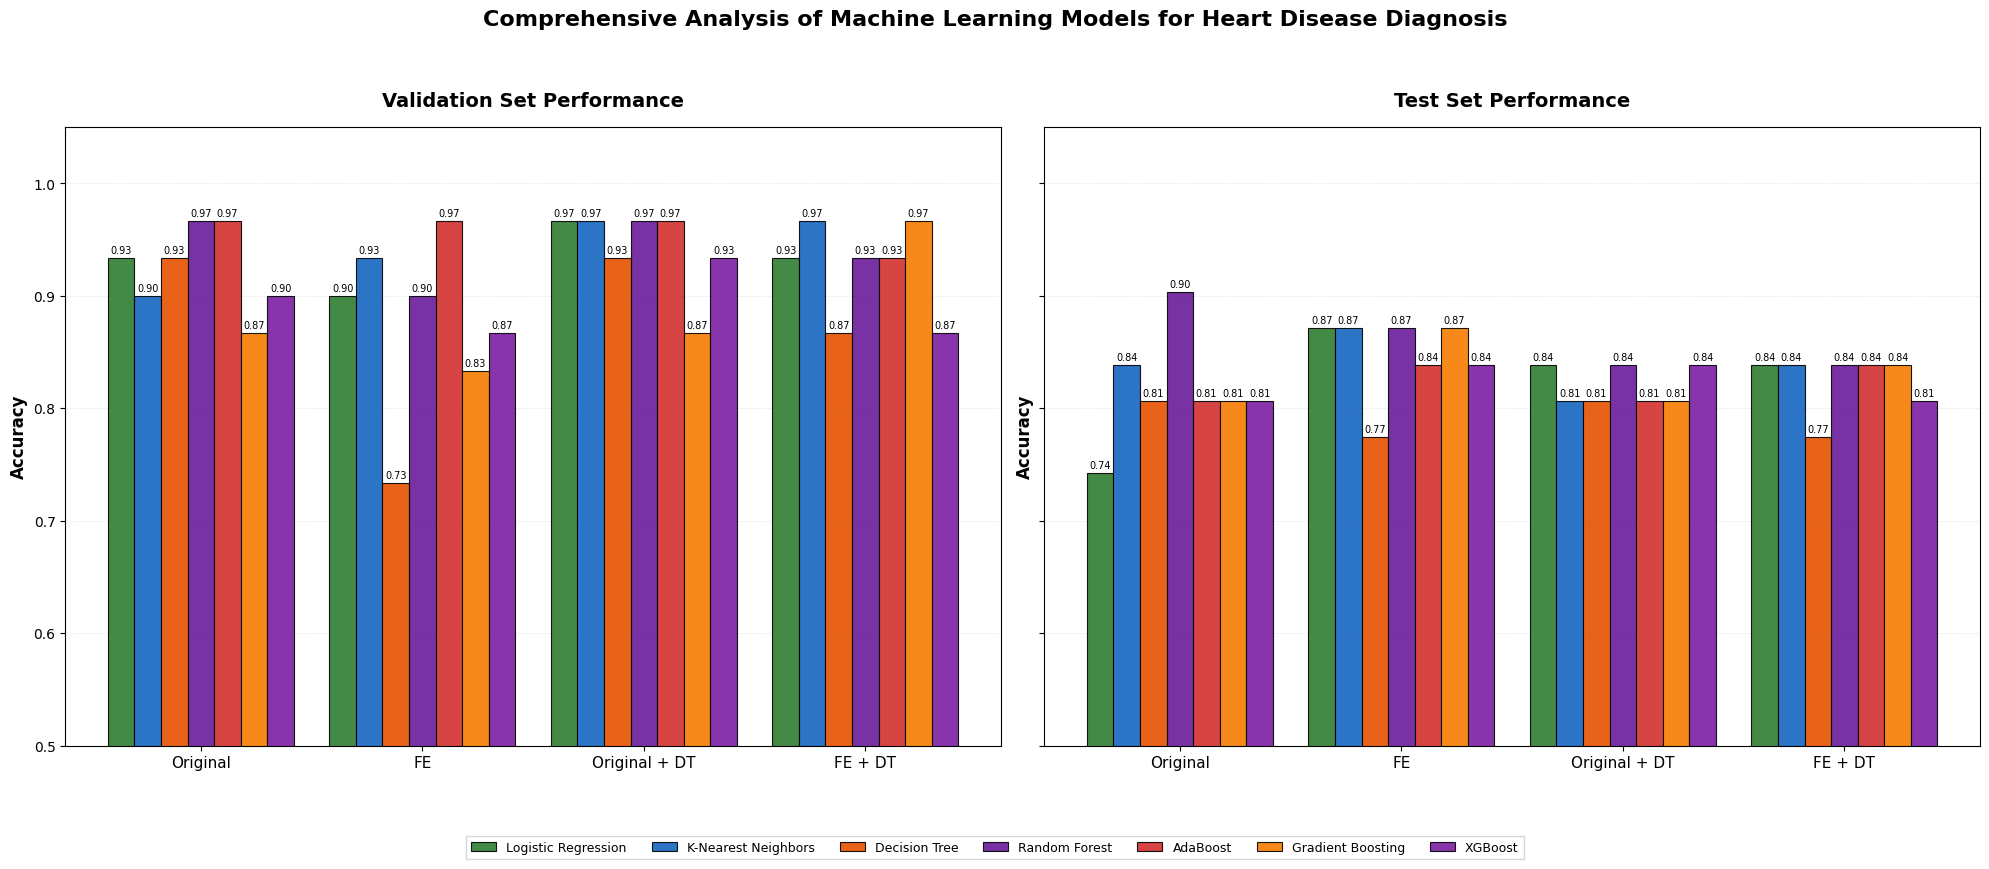

In [52]:
# Tạo biểu đồ so sánh tổng thể tất cả mô hình
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10

# Định nghĩa màu sắc chuyên nghiệp
colors = {
    'Logistic Regression': '#2E7D32',     # Xanh lá đậm
    'K-Nearest Neighbors': '#1565C0',    # Xanh dương đậm
    'Decision Tree': '#E65100',           # Cam đậm
    'Random Forest': '#6A1B9A',          # Tím đậm
    'AdaBoost': '#D32F2F',                # Đỏ đậm
    'Gradient Boosting': '#F57C00',       # Cam
    'XGBoost': '#7B1FA2'                 # Tím
}

datasets = ['Original', 'FE', 'Original + DT', 'FE + DT']

# Tổng hợp kết quả validation
lr_val_scores = [lr_val_acc, lr_val_fe_acc, lr_val_dt_acc, lr_val_fe_dt_acc]
knn_val_scores = [knn_val_acc, knn_val_fe_acc, knn_val_dt_acc, knn_val_fe_dt_acc]
dt_val_scores = [dt_val_acc, dt_val_fe_acc, dt_val_dt_acc, dt_val_fe_dt_acc]
rf_val_scores = [rf_val_acc, rf_val_fe_acc, rf_val_dt_acc, rf_val_fe_dt_acc]
ada_val_scores = [ada_val_acc, ada_val_fe_acc, ada_val_dt_acc, ada_val_fe_dt_acc]
gb_val_scores = [gb_val_acc, gb_val_fe_acc, gb_val_dt_acc, gb_val_fe_dt_acc]
xgb_val_scores = [xgb_val_acc, xgb_val_fe_acc, xgb_val_dt_acc, xgb_val_fe_dt_acc]

# Tổng hợp kết quả test
lr_test_scores = [lr_test_acc, lr_test_fe_acc, lr_test_dt_acc, lr_test_fe_dt_acc]
knn_test_scores = [knn_test_acc, knn_test_fe_acc, knn_test_dt_acc, knn_test_fe_dt_acc]
dt_test_scores = [dt_test_acc, dt_test_fe_acc, dt_test_dt_acc, dt_test_fe_dt_acc]
rf_test_scores = [rf_test_acc, rf_test_fe_acc, rf_test_dt_acc, rf_test_fe_dt_acc]
ada_test_scores = [ada_test_acc, ada_test_fe_acc, ada_test_dt_acc, ada_test_fe_dt_acc]
gb_test_scores = [gb_test_acc, gb_test_fe_acc, gb_test_dt_acc, gb_test_fe_dt_acc]
xgb_test_scores = [xgb_test_acc, xgb_test_fe_acc, xgb_test_dt_acc, xgb_test_fe_dt_acc]

# Tạo figure với 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

x_pos = np.arange(len(datasets))
width = 0.12  # Điều chỉnh width cho 7 bars

# Validation Accuracy Plot
bars1_val = ax1.bar(x_pos - 3*width, lr_val_scores, width, 
                    label='Logistic Regression', color=colors['Logistic Regression'], 
                    edgecolor='black', linewidth=0.8, alpha=0.9)
bars2_val = ax1.bar(x_pos - 2*width, knn_val_scores, width,
                    label='K-Nearest Neighbors', color=colors['K-Nearest Neighbors'],
                    edgecolor='black', linewidth=0.8, alpha=0.9)
bars3_val = ax1.bar(x_pos - width, dt_val_scores, width,
                    label='Decision Tree', color=colors['Decision Tree'],
                    edgecolor='black', linewidth=0.8, alpha=0.9)
bars4_val = ax1.bar(x_pos, rf_val_scores, width,
                    label='Random Forest', color=colors['Random Forest'],
                    edgecolor='black', linewidth=0.8, alpha=0.9)
bars5_val = ax1.bar(x_pos + width, ada_val_scores, width,
                    label='AdaBoost', color=colors['AdaBoost'],
                    edgecolor='black', linewidth=0.8, alpha=0.9)
bars6_val = ax1.bar(x_pos + 2*width, gb_val_scores, width,
                    label='Gradient Boosting', color=colors['Gradient Boosting'],
                    edgecolor='black', linewidth=0.8, alpha=0.9)
bars7_val = ax1.bar(x_pos + 3*width, xgb_val_scores, width,
                    label='XGBoost', color=colors['XGBoost'],
                    edgecolor='black', linewidth=0.8, alpha=0.9)

ax1.set_ylim(0.5, 1.05)
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='semibold')
ax1.set_title('Validation Set Performance', fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(datasets, fontsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)

# Test Accuracy Plot
bars1_test = ax2.bar(x_pos - 3*width, lr_test_scores, width,
                     label='Logistic Regression', color=colors['Logistic Regression'],
                     edgecolor='black', linewidth=0.8, alpha=0.9)
bars2_test = ax2.bar(x_pos - 2*width, knn_test_scores, width,
                     label='K-Nearest Neighbors', color=colors['K-Nearest Neighbors'],
                     edgecolor='black', linewidth=0.8, alpha=0.9)
bars3_test = ax2.bar(x_pos - width, dt_test_scores, width,
                     label='Decision Tree', color=colors['Decision Tree'],
                     edgecolor='black', linewidth=0.8, alpha=0.9)
bars4_test = ax2.bar(x_pos, rf_test_scores, width,
                     label='Random Forest', color=colors['Random Forest'],
                     edgecolor='black', linewidth=0.8, alpha=0.9)
bars5_test = ax2.bar(x_pos + width, ada_test_scores, width,
                     label='AdaBoost', color=colors['AdaBoost'],
                     edgecolor='black', linewidth=0.8, alpha=0.9)
bars6_test = ax2.bar(x_pos + 2*width, gb_test_scores, width,
                     label='Gradient Boosting', color=colors['Gradient Boosting'],
                     edgecolor='black', linewidth=0.8, alpha=0.9)
bars7_test = ax2.bar(x_pos + 3*width, xgb_test_scores, width,
                     label='XGBoost', color=colors['XGBoost'],
                     edgecolor='black', linewidth=0.8, alpha=0.9)

ax2.set_ylim(0.5, 1.05)
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='semibold')
ax2.set_title('Test Set Performance', fontsize=14, fontweight='bold', pad=15)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(datasets, fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax2.set_axisbelow(True)

# Thêm giá trị lên các cột
def annotate_bars(ax, bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0.5:  # Chỉ hiển thị giá trị nếu > 0.5
            ax.annotate(f'{height:.2f}',
                       xy=(bar.get_x() + bar.get_width()/2, height),
                       xytext=(0, 2),
                       textcoords="offset points",
                       ha='center', va='bottom',
                       fontsize=7, fontweight='medium')

# Áp dụng annotations
for bars in [bars1_val, bars2_val, bars3_val, bars4_val, bars5_val, bars6_val, bars7_val]:
    annotate_bars(ax1, bars)
for bars in [bars1_test, bars2_test, bars3_test, bars4_test, bars5_test, bars6_test, bars7_test]:
    annotate_bars(ax2, bars)

# Legend chung
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05),
          ncol=7, frameon=True, fontsize=9, fancybox=False, shadow=False)

# Main title
fig.suptitle('Comprehensive Analysis of Machine Learning Models for Heart Disease Diagnosis',
            fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout(rect=[0, 0.05, 1, 0.98])

# Save figure với DPI cao
save_path = '../results/figures'
os.makedirs(save_path, exist_ok=True)
plt.savefig(f'{save_path}/comprehensive_model_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{save_path}/comprehensive_model_comparison.pdf', bbox_inches='tight')

plt.show()
